<a href="https://colab.research.google.com/github/lcchennn/logistic-regression-from-scratch/blob/main/logistic_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression from Scratch - Titanic Survival Prediction
### Name: Li-Chia Chen
### Kaggle ID: lcchennn (Score: 0.78468)


## I. Introduction
In this project, a logistic regression model is built using only Numpy and Pandas in Python. From data exploration, data processing, feature selection, feature engineering, to model training/testing. The predictions are generated for Kaggle competition submission. 
### 1. Logistic Regression
The machine learning model built in this project is logistic regression, using the logistic function and the cross entropy loss function as described below.

##### 1) Logistic Function
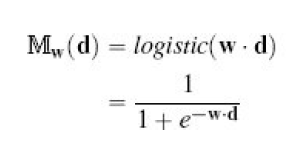
Reference[1]

Using the logistic function, first pass the dot product of the weights vetor (w) and the features vector (d) into a logistic function. If the resulting number (probability) is equal to or larger than 0.5, the instance will be classified into class 1 and if the resulting number is less than 0.5, the instance will be classified into class 0.

##### 2) Cross Entropy Loss Function
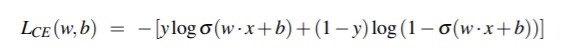
Reference[2]


Using cross entropy calculation as the loss function. Our goal is to minimize the loss and find the best fit.

#### 3) Weight Update Rule

##### - Cost Function
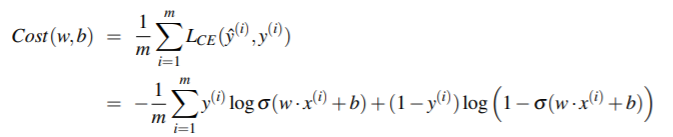
Reference[2]


Cost function is used to calculated the cost for the training set in m instances and get the average cost for each instance by dividing the cost by m. (σ = logistic function)

##### - Weight Update Function
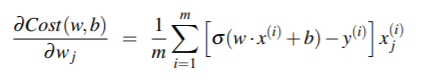
Reference[2]

To find the minimal cost, we are deriving the cost function by w, and the using the derived function for weight update. (σ = logistic function)

##### - Weight Update Calculation

Weight <- Weight + learning rate <text>* 1/m * sum(logistic(w ⋅ d) - y) * X</text>
<br>m: m samples

### 2. Pseudocode

#### Part 1 Model training using the train.csv dataset
Data Split:
Split the train.csv dataset into training and testing set.

Training:
Iterater through 1-5 to find the weights with minimal loss and output weights.
1. Set initial weights as 0 for each feature
2. Calculate predicted_y (mwd) = w ⋅ d
3. Pass the predicted_y into logistic function (logistic(w ⋅ d))
4. Update weight: Weight <- Weight + learning rate <text>* 1/m * sum(logistic(w ⋅ d) - y) * X</text>
5. Review cross entropy value to see if the weight is updated to the right direction and if the learning rate is optimal (in each iteration, the cross entropy should be smaller)

Testing:
1. Using the weights generated from training, calculate predicted_y (mwd) = w ⋅ d
2. Pass the predicted_y into logistic function logistic(w ⋅ d)
3. For class prediction, if logistic(w ⋅ d) >= 0.5, Survived=1 else Survived=0

Optimization:
1. Adjust parameter and repeat training and testing

#### Part 2 Prediction using the test.csv dataset
1. Using the weights generated from training, calculate predicted_y (mwd) = w ⋅ d
2. Pass the predicted_y into logistic function logistic(w ⋅ d)
3. For class prediction, if logistic(w ⋅ d) >= 0.5, Survived=1 else Survived=0
4. Save prediction as submission.csv file

## II. Data Exploraion
First, explore the data using basic statistics, null value check, and data visualization.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv(r'https://raw.githubusercontent.com/lcchennn/logistic-regression-from-scratch/main/train.csv')
test = pd.read_csv(r'https://raw.githubusercontent.com/lcchennn/logistic-regression-from-scratch/main/test.csv')

In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### 1) Statistics

#### Train dataset statistics for numeric columns

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Test dataset statistics for numeric columns

In [7]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


 #### 2) Check null values

In [8]:
# Check if any null values
print('Columns with null value in train set: \n', train.isna().any()[lambda x: x])
print('Columns with null value in test set: \n', test.isna().any()[lambda x: x])

Columns with null value in train set: 
 Age         True
Cabin       True
Embarked    True
dtype: bool
Columns with null value in test set: 
 Age      True
Fare     True
Cabin    True
dtype: bool


The following columns contains null values: Age, Cabin, Fare Embarked.

 #### 3) Data Visualization
1. Pairplot: Data distribution visualizaition.
<br>- Uniform distribution: PassengerId
<br>- Exponential distribution: SibSp, Parch, Fare
<br>- Right-skewed normal distribution: Age
<br>- Bimodal distribution: Survived
<br>- Multimodal distribution: Pclass


2. Heatmap: Correlation visualization.
<br>- Negatively correlated: Pclass and Fare / Pclass and Survived
<br>- Positively correlated: Fare and Parch / Fare and Survived




##### Pairplot

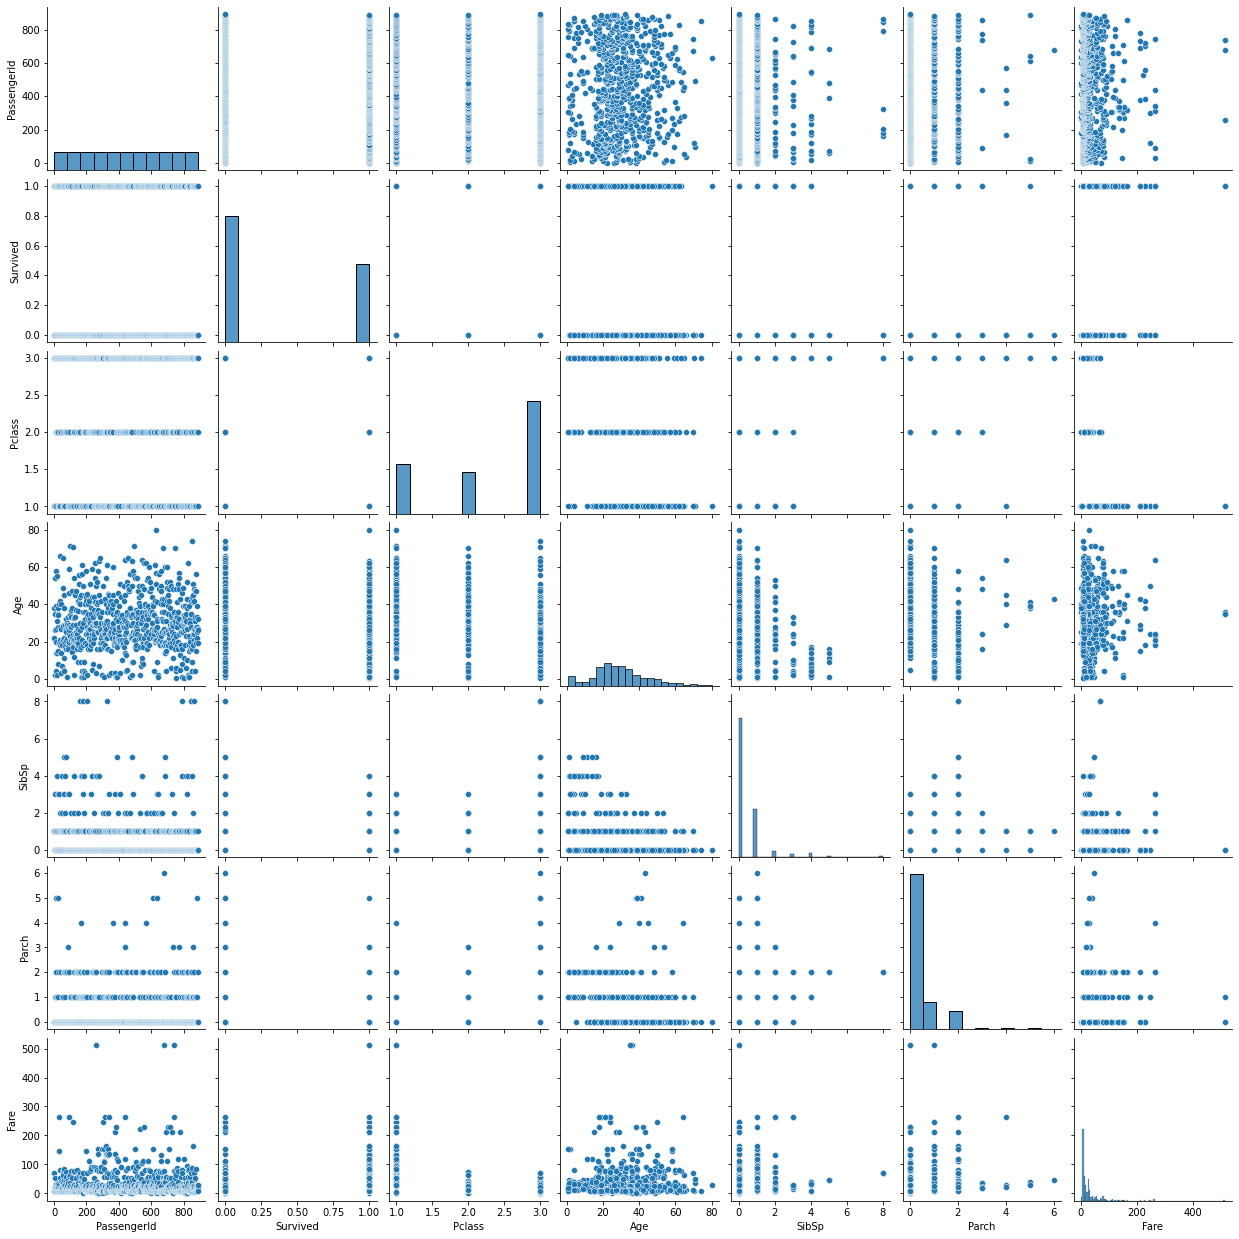

In [9]:
# pairplot
sns.pairplot(train)

##### Heatmap

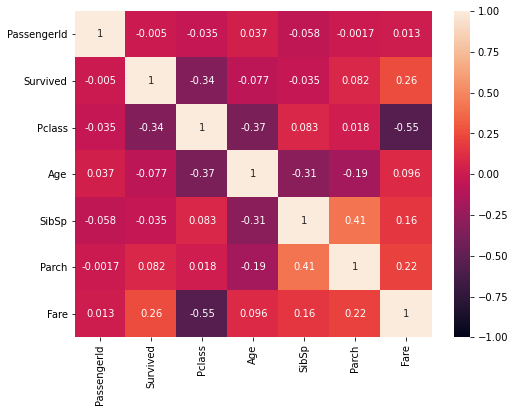

In [10]:
# correlation heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(train.corr(), vmin=-1, annot=True)


## III. Data Processing
Data processing is split intot 2 sections, in the first section, the data process function will deal with missing data, transform categorical features into numeric values, and do further feature engineering. For the second section, the function will transform the text-based Name feature into the categorical name2 feature.

<b>Process 1</b>
1. Missing data imputation:
<br>- Numeric features: Replace with mean value
<br>- Categorical features: Replace with the most frequent value
2. Transform categorical features values into numeric values:
<br>- Sex: label encoding as there are only 2 levels
<br>- Pclass: one-hot encoding as there are 3 classes and in the dataset description the relationships of the 3 classes are not provided
<br>- Embarked: one-hot encoding as there are 3 types and in the dataset description the relationships of the 3 types are not provided
3. Combine SipSp and Parch into a single variable accompany

<b>Process 2</b>
1. Parse the name variable and extract the title in the names, transform into a variable with multiple title categories.
<br>- Extract titles in the name by identifying the words with period ('.')
<br>- Check if the extracted title are really titles or just name abbreviations
<br>- Count title frequency, group titles with frequency less than 5
<br>- Assign title class with numeric values


In [11]:
def process(df):
    local_df = df.copy()
    # Drop columns that will not be used as features
    local_df.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)
    
    # Fill Age with the mean value
    local_df[['Age']] = local_df[['Age']].fillna(local_df[['Age']].mean())
    
    # Fill Embarked with the most frequent value
    local_df[['Embarked']] = local_df[['Embarked']].fillna(train['Embarked']. value_counts().index[0])
    
    # Fill Embarked with the most frequent value
    local_df[['Fare']] = local_df[['Fare']].fillna(local_df[['Fare']].mean())

    ####################
    # Replace Cabin with boolean values
    # if has a cabin then 1 else 0
        
    local_df['cabin'] = [0 if i else 1 for i in list(local_df.Cabin.isnull())]
    
    ####################
    # Replace Sex with numeric values
    def sex(i):
        if i.Sex == 'male':
            return 0
        elif i.Sex == 'female':
            return 1
        
    local_df['sex'] = local_df.apply(sex, axis='columns')
    
    
    ####################
    # Replace Embarked with numeric values using one-hot encoding and drop original columns
    local_df = pd.get_dummies(local_df, prefix=['class' ,'embark'], columns=['Pclass', 'Embarked'])
#     local_df = pd.get_dummies(local_df, prefix=['embark'], columns=['Embarked'])
    
    
    #################### 
    # Count accompanies with Sibsp and Parch
    def fam(x):
        if x.SibSp + x.Parch > 0:
#             return 1
            return x.SibSp + x.Parch
        else:
            return 0

    local_df['accomany'] = local_df.apply(fam, axis='columns')

    # Drop character based Sex, Embarked column
    local_df.drop(['Sex', 'SibSp', 'Parch', 'Cabin'], axis =1, inplace=True)

    
    return local_df


In [12]:
def process2(df):
    local_df = df.copy()
    #################### 
    # Process the Name feature 
    lst=[]
    for i in local_df.Name:
        words = i.split()
        for i in words:
            if '.' in i:
                lst.append(i)

    name = pd.DataFrame(np.unique(np.array(lst), return_counts=True)).transpose()
    name.columns=['title', 'c']
    name = name.sort_values(by='c', ascending=False).reset_index()

    problem = name.loc[name.c  < 5].title.tolist()

    print(problem)

    # Check if the words in the problem list are really title or just a name abbreviation
    for i in local_df.Name:
        if any(x in i for x in problem):
            print(i)

    # Remove L. from the title list
    name = name[name.title != 'L.']
    
    print(name)

    # Group title with count less than 5 and generate title list
    titlelist = name.title.tolist()

    # print(titlelist)
    
    max_index = min(name[name.c<10].index.values)
    
    def titlenum(x):
        for m in titlelist:
            if m in x.Name:
                if titlelist.index(m) < max_index:
                    return titlelist.index(m)
                else:
                    return max_index
                
    local_df['name2'] = local_df.apply(titlenum, axis='columns')
    

    # Drop character based Name column
    local_df.drop(['Name'], axis =1, inplace=True)
    
    return local_df
    

## IV. Model Training

### Split the train dataset into training and testing set

In [13]:
# split into train and test dataset
def split(local_df, size, target):

    shuffled_df = local_df.sample(frac=1, random_state=11)

    train_size = int(len(local_df)*size)

    train = shuffled_df[: train_size]
    test = shuffled_df[train_size :]
    
    X_train = train.iloc[:, train.columns !=target]
    y_train = train.iloc[:, train.columns==target].values.ravel()
    
    X_test = test.iloc[:, train.columns !=target]
    y_test = test.iloc[:, train.columns==target].values.ravel()

    return X_train, y_train, X_test, y_test, train, test


### Logistic Regression

In [14]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

def crossentropy(mwd, y):
    return (-y * np.log(mwd) - (1 - y) * np.log(1 - mwd)).mean()

def wupdate(X, y, lr, iterations):
    
    # initial weight as 0
    w = np.array([0 for _ in range((X.shape[1]))]).astype('float64')
    
    for i in range(iterations):
        mwd=logistic(X@w)

        # weight update
        w += lr*X.T@(y-mwd) / len(y)
        # print the first 5 cross entropy
        if i<5:
            print(i, crossentropy(mwd,y))

    return X, w

def predict(X, w):
    y_pred=[1 if i>=0.5 else 0 for i in logistic(X@w)]
    return y_pred


### 1) Process train dataset and split into training / testing set

In [15]:
dfp = process(train)
dfp = process2(dfp)
X_train, y_train, X_test, y_test, train_, test_  = split(dfp, 0.7, 'Survived')

['Mlle.', 'Major.', 'Col.', 'Ms.', 'Mme.', 'Capt.', 'Lady.', 'L.', 'Jonkheer.', 'Don.', 'Countess.', 'Sir.']
Uruchurtu, Don. Manuel E
Aubart, Mme. Leontine Pauline
Reynaldo, Ms. Encarnacion
Peuchen, Major. Arthur Godfrey
Rothschild, Mrs. Martin (Elizabeth L. Barrett)
Butt, Major. Archibald Willingham
Duff Gordon, Lady. (Lucille Christiana Sutherland) ("Mrs Morgan")
Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")
Sagesser, Mlle. Emma
Simonius-Blumer, Col. Oberst Alfons
Weir, Col. John
Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")
Crosby, Capt. Edward Gifford
Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)
Reuchlin, Jonkheer. John George
    index      title    c
0      13        Mr.  517
1      10      Miss.  182
2      14       Mrs.  125
3       9    Master.   40
4       4        Dr.    7
5      16       Rev.    6
6      11      Mlle.    2
7       8     Major.    2
8       1       Col.    2
9      15        Ms.    1
10     12       Mme.    1
11      0      Capt.    1
12      7

### 2) Visualization for processed data

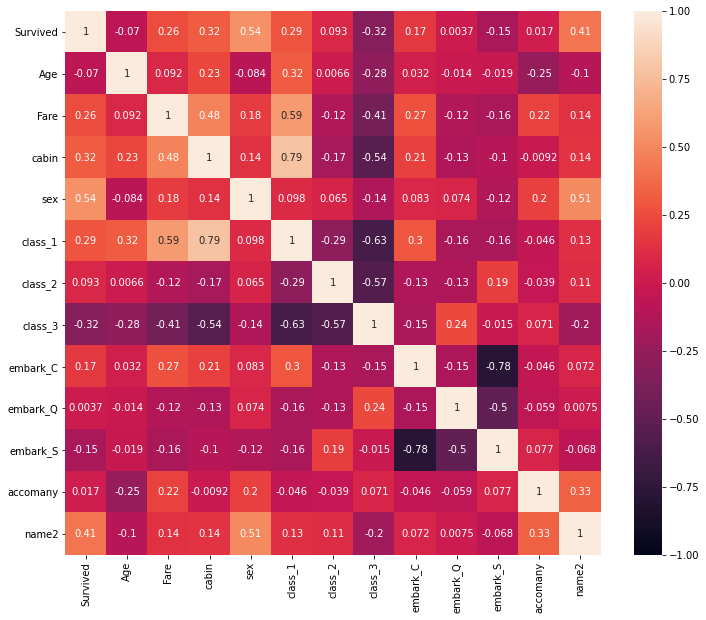

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(dfp.corr(), vmin=-1, annot=True)

### 3) Model training and testing

In [17]:
X, w = wupdate(X_train, y_train, 0.006, 25000)
y_pred = predict(X_test, w)


0 0.693147180559947
1 0.6313311654344078
2 0.6619587487773041
3 0.8010531824396888
4 0.8345098845721706


#### 3) Model Evaluation

In [18]:
def accuracy(y_test, y_pred):
    correct=0
    count=0
    for m, n in zip(y_test, y_pred):
        count += 1 
        if m==n:
            correct +=1
    return round(correct/count,2)*100
            

Accuracy: 80.0 %

Confusion Matrix: 
 Predict    0   1
True            
0        143  21
1         32  72


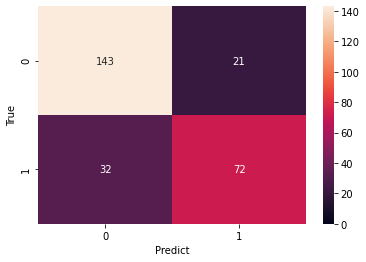

In [19]:
print('Accuracy:', accuracy(y_test, y_pred), '%')

print()

def confusion(y_test, y_pred):
    y_t = pd.Series(y_test, name='True')
    y_p = pd.Series(y_pred, name='Predict')

    df_confusion = pd.crosstab(y_t, y_p, rownames=['True'], colnames=['Predict'])
    print('Confusion Matrix: \n', df_confusion)

    import seaborn as sns
    %matplotlib inline
    sns.heatmap(df_confusion, vmin=0, annot=True, fmt='g')
confusion(y_test, y_pred)

The accuracy rate for the test set is 80%. From the confusion matrix, it is shown that this model correct predicts 143 class 0 (did not survived) samples out of all 164 class 0 samples, and predicts 72 class 1 (survived) sample.

## V. Generate predictions for submission

#### 1) View test dataset

In [20]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#### 2) Check weights

In [21]:
w

Age        -0.042107
Fare        0.001229
cabin       0.919868
sex         2.337837
class_1     0.308347
class_2    -0.048326
class_3    -0.861917
embark_C   -0.009001
embark_Q    0.038581
embark_S   -0.631475
accomany   -0.401920
name2       0.581043
dtype: float64

#### 3) Process test dataset

In [22]:
testdf1 = process(test)
testdf = process2(testdf1)
testdf

['Col.', 'Rev.', 'Dona.', 'Dr.', 'Ms.']
O'Donoghue, Ms. Bridget
Gracie, Col. Archibald IV
Lahtinen, Rev. William
Peruschitz, Rev. Joseph Maria
Astor, Col. John Jacob
Dodge, Dr. Washington
Oliva y Ocana, Dona. Fermina
   index    title    c
0      5      Mr.  240
1      4    Miss.   78
2      6     Mrs.   72
3      3  Master.   21
4      0     Col.    2
5      8     Rev.    2
6      1    Dona.    1
7      2      Dr.    1
8      7      Ms.    1


,Age,Fare,cabin,sex,class_1,class_2,class_3,embark_C,embark_Q,embark_S,accomany,name2
0,34.50000,7.8292,0,0,0,0,1,0,1,0,0,0
1,47.00000,7.0000,0,1,0,0,1,0,0,1,1,2
2,62.00000,9.6875,0,0,0,1,0,0,1,0,0,0
3,27.00000,8.6625,0,0,0,0,1,0,0,1,0,0
4,22.00000,12.2875,0,1,0,0,1,0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,30.27259,8.0500,0,0,0,0,1,0,0,1,0,0
414,39.00000,108.9000,1,1,1,0,0,1,0,0,0,4
415,38.50000,7.2500,0,0,0,0,1,0,0,1,0,0
416,30.27259,8.0500,0,0,0,0,1,0,0,1,0,0


#### 4) Statistics of processed test dataframe

In [23]:
testdf.describe()

,Age,Fare,cabin,sex,class_1,class_2,class_3,embark_C,embark_Q,embark_S,accomany,name2
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,30.272590,35.627188,0.217703,0.363636,0.255981,0.222488,0.521531,0.244019,0.110048,0.645933,0.839713,0.748804
std,12.634534,55.840500,0.413179,0.481622,0.436934,0.416416,0.500135,0.430019,0.313324,0.478803,1.519072,1.018562
min,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.272590,14.454200,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,35.750000,31.500000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,76.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,4.000000


#### 5) Generate Predictions

In [24]:
predictions = predict(testdf, w)

In [25]:
print(predictions)

[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 

In [26]:
sub = pd.DataFrame(test[['PassengerId']])
sub['Survived'] = predictions
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


#### 6) Saving Results to CSV file

In [27]:
sub.to_csv(r'D:\Fall 2020\DATA245\Homework\Project\submission_final.csv', index=False)

## VI. Effect of data normalization

In [28]:
def normalize(df):
    n_df=pd.DataFrame()
    for f in df.columns:
        min_val = min(df[f])
        max_val = max(df[f])
        fea_val=[]
        for i in df[f]:
            fea_val.append((i-min_val)/(max_val-min_val))
        n_df[f]=fea_val
    return n_df
            

In [29]:
X_train_ = normalize(X_train)
X_test_ = normalize(X_test)
X_, w_ = wupdate(X_train_, y_train, 0.006, 25000)

0 0.693147180559947
1 0.6928411756304306
2 0.6925358025204942
3 0.6922310593659884
4 0.6919269443088718


In [30]:
y_pred_ = predict(X_test_, w)
print('Accuracy:', accuracy(y_test, y_pred_))


Accuracy: 73.0


Normalizing the data does not improve model accuracy, so normalization will not be used for test.csv dataset prediction.

## VII. Future work

To improve the accuracy of the algorithm, bias can be considered and the calculation can be updated as logistic(w ⋅ d + b) to see if it improves the prediction result.

### Reference
[1] Kelleher, J. D., Namee, B. M., &amp; D'Arcy, A. (2015). Fundamentals of machine learning for predictive data analytics: Algorithms, worked examples, and case studies. Cambridge, MA: The MIT Press.
<br>[2] https://web.stanford.edu/~jurafsky/slp3/5.pdf
